In [90]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib
import math
from IPython.display import display, HTML
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = [10., 5.]
matplotlib.rcParams["font.size"] = "16"
matplotlib.rcParams["lines.linewidth"] = "3"
matplotlib.rcParams["axes.grid"] = True

Processing 15cm_noweight.csv
Energy Loss: -0.0002239 (J/cm)


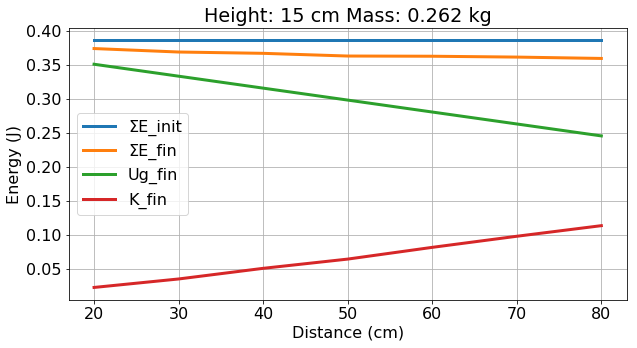

,Mass (kg),Speed (m/s),Height (cm),Distance (cm),Ug_i (J),Ug_f (J),K_i (J),K_f (J),ΣE_i (J),ΣE_f (J),ΔE (J)
0,0.2624,0.419,0.136364,20,0.385728,0.350662,0.0,0.023034,0.385728,0.373695,-0.012033
1,0.2624,0.520,0.129545,30,0.385728,0.333129,0.0,0.035476,0.385728,0.368605,-0.017123
2,0.2624,0.624,0.122727,40,0.385728,0.315596,0.0,0.051086,0.385728,0.366682,-0.019046
3,0.2624,0.702,0.115909,50,0.385728,0.298063,0.0,0.064656,0.385728,0.362718,-0.023010
4,0.2624,0.790,0.109091,60,0.385728,0.280529,0.0,0.081882,0.385728,0.362411,-0.023317
5,0.2624,0.865,0.102273,70,0.385728,0.262996,0.0,0.098167,0.385728,0.361163,-0.024565
6,0.2624,0.931,0.095455,80,0.385728,0.245463,0.0,0.113719,0.385728,0.359182,-0.026546


Processing 15cm_weight.csv
Energy Loss: -0.0007183 (J/cm)


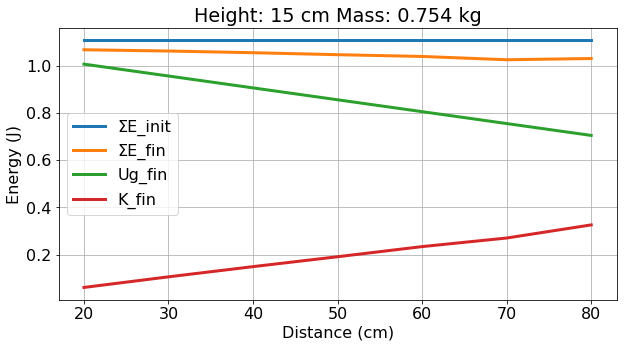

,Mass (kg),Speed (m/s),Height (cm),Distance (cm),Ug_i (J),Ug_f (J),K_i (J),K_f (J),ΣE_i (J),ΣE_f (J),ΔE (J)
0,0.7538,0.402,0.136364,20,1.108086,1.007351,0.0,0.060909,1.108086,1.068259,-0.039827
1,0.7538,0.530,0.129545,30,1.108086,0.956983,0.0,0.105871,1.108086,1.062855,-0.045231
2,0.7538,0.629,0.122727,40,1.108086,0.906616,0.0,0.149117,1.108086,1.055733,-0.052353
3,0.7538,0.712,0.115909,50,1.108086,0.856248,0.0,0.191067,1.108086,1.047315,-0.060771
4,0.7538,0.788,0.109091,60,1.108086,0.805881,0.0,0.234034,1.108086,1.039915,-0.068171
5,0.7538,0.847,0.102273,70,1.108086,0.755513,0.0,0.270391,1.108086,1.025905,-0.082181
6,0.7538,0.930,0.095455,80,1.108086,0.705146,0.0,0.325981,1.108086,1.031126,-0.076960


Processing 20cm_weight.csv
Energy Loss: -0.0012174 (J/cm)


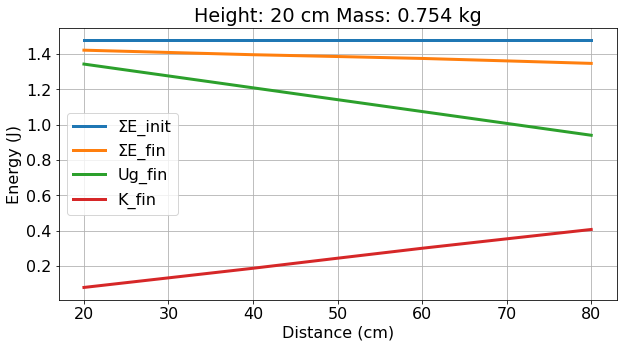

,Mass (kg),Speed (m/s),Height (cm),Distance (cm),Ug_i (J),Ug_f (J),K_i (J),K_f (J),ΣE_i (J),ΣE_f (J),ΔE (J)
0,0.7538,0.457,0.181818,20,1.477448,1.343135,0.0,0.078715,1.477448,1.421850,-0.055598
1,0.7538,0.594,0.172727,30,1.477448,1.275978,0.0,0.132984,1.477448,1.408962,-0.068486
2,0.7538,0.705,0.163636,40,1.477448,1.208821,0.0,0.187329,1.477448,1.396150,-0.081298
3,0.7538,0.805,0.154545,50,1.477448,1.141664,0.0,0.244241,1.477448,1.385905,-0.091543
4,0.7538,0.893,0.145455,60,1.477448,1.074508,0.0,0.300559,1.477448,1.375066,-0.102382
5,0.7538,0.969,0.136364,70,1.477448,1.007351,0.0,0.353894,1.477448,1.361245,-0.116203
6,0.7538,1.039,0.127273,80,1.477448,0.940194,0.0,0.406871,1.477448,1.347066,-0.130382


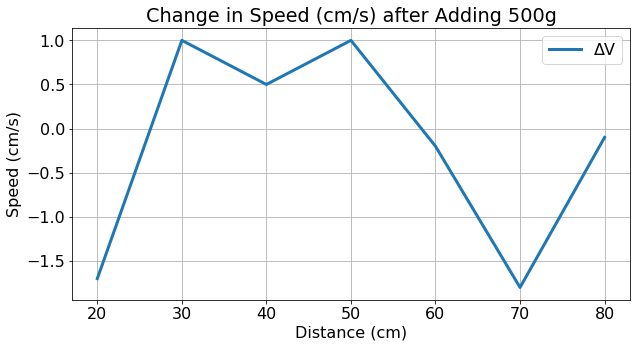

In [93]:
def lab(filename, track_height, track_length=2.20):
    print('Processing %s' % filename)
    df = pd.read_csv(filename)
    
    # Constants
    mass = df['Mass (kg)']
    distance = df['Distance (cm)'] / 100.
    theta = math.asin(track_height / track_length) 
    
    conditions = "Height: %d cm Mass: %0.3f kg" % (track_height*100, mass[0])

    hypotenuse = track_length - distance
    gate_height = hypotenuse * math.sin(theta)
    df['Height (cm)'] = gate_height
        
    potential_energy_initial = track_height * mass * 9.8    
    potential_energy_final = gate_height * mass * 9.8
    
    df['Ug_i (J)'] = potential_energy_initial
    df['Ug_f (J)'] = potential_energy_final
    
    kinetic_energy_initial = 0.
    kinetic_energy_final = 1/2 * mass * np.square(df['Speed (m/s)'])
    
    df['K_i (J)'] = kinetic_energy_initial
    df['K_f (J)'] = kinetic_energy_final
    
    sigma_e_initial = np.full((distance.shape[0],), potential_energy_initial + kinetic_energy_initial)
    sigma_e_final = potential_energy_final + kinetic_energy_final
    
    df['ΣE_i (J)'] = sigma_e_initial
    df['ΣE_f (J)'] = sigma_e_final
    
    delta_e = sigma_e_final - sigma_e_initial
    
    df['ΔE (J)'] = delta_e

    def linear_regression(x_vals, y_vals):

        reg = linear_model.LinearRegression()
        reg.fit(x_vals.values.reshape(x_vals.shape[0], 1), y_vals.values.reshape(y_vals.shape[0], 1))

        m = reg.coef_[0]
        b = reg.intercept_
        
        return m, b
    
    m, b = linear_regression(df['Distance (cm)'], delta_e)
    
    print("Energy Loss: %.7f (J/cm)" % m)
        
    plt.plot(df['Distance (cm)'], sigma_e_initial)
    plt.plot(df['Distance (cm)'], sigma_e_final)
    plt.plot(df['Distance (cm)'], potential_energy_final)
    plt.plot(df['Distance (cm)'], kinetic_energy_final)
    
    plt.ylabel('Energy (J)')
    plt.xlabel('Distance (cm)')
    
    plt.legend(['ΣE_init', 'ΣE_fin', 'Ug_fin', 'K_fin'])
    plt.title(conditions)
    plt.draw()
    plt.savefig(conditions + '.png')
    plt.show()
    
    display(df)
    return df
    
    
df_15nw = lab('15cm_noweight.csv', 0.15)
df_15w = lab('15cm_weight.csv', 0.15)
df_20w = lab('20cm_weight.csv', 0.20)

delta_v = (df_15w['Speed (m/s)'] - df_15nw['Speed (m/s)']) * 100
plt.plot(df_15nw['Distance (cm)'], delta_v)

plt.ylabel('Speed (cm/s)')
plt.xlabel('Distance (cm)')

plt.legend(['ΔV'])
plt.title("Change in Speed (cm/s) after Adding 500g")
plt.savefig('delta_v.png')

plt.show()


